In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch as pwelch
from scipy.io import loadmat

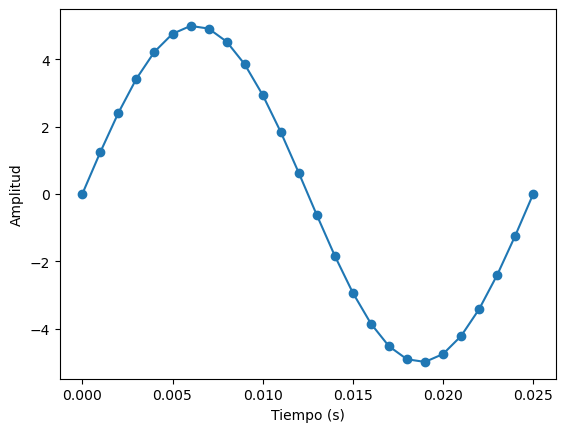

In [1]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

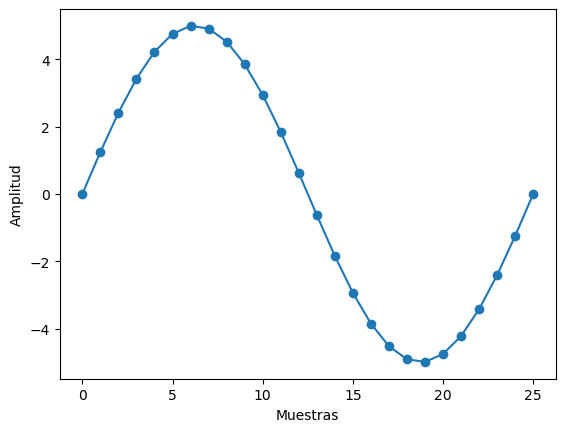

In [2]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

In [15]:
# Comprobar las 5 primeras muestras
muestras_continuas = x[:5]
muestras_discretas = x1[:5]

muestras_continuas, muestras_discretas

(array([0.        , 1.24344944, 2.40876837, 3.42273553, 4.22163963]),
 array([0.        , 1.24344944, 2.40876837, 3.42273553, 4.22163963]))

# Las 5 primeras muestras efectivamente son las mismas para ambas formas de graficar

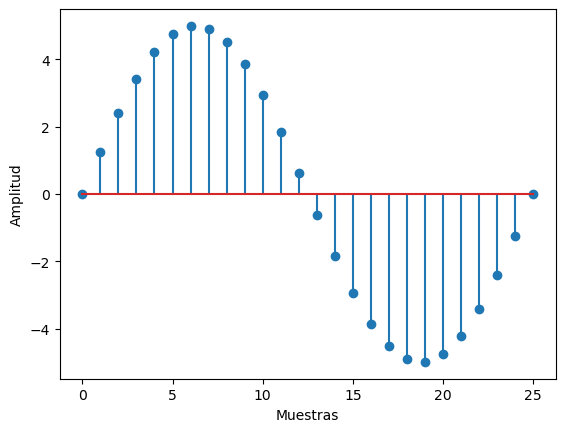

In [4]:
plt.stem(n, x1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

In [16]:
energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)

t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)

print(potencia)
print(potencia10)

12.500000000000002
12.500000000000005


# ¿Por que las potencias son iguales?

Las potencias son iguales, ya que la segunda potencia consta de un vector tiempo multiplicado por 10, y la señal seno de entrada tambien multiplicada por 10, por lo que a la hora de hacer la operacion de potencia se divide la energia de la señal en 10 ciclos, sobre el numero de muestras de 10 ciclos, entonces se mantiene la relación entre la energia y el numero de muestras que en el calculo de la potencia de un solo ciclo. La potencia de una señal periódica se mantiene constante cuando la forma de la señal y la amplitud no cambian, sin importar el número de ciclos que se consideren en el cálculo

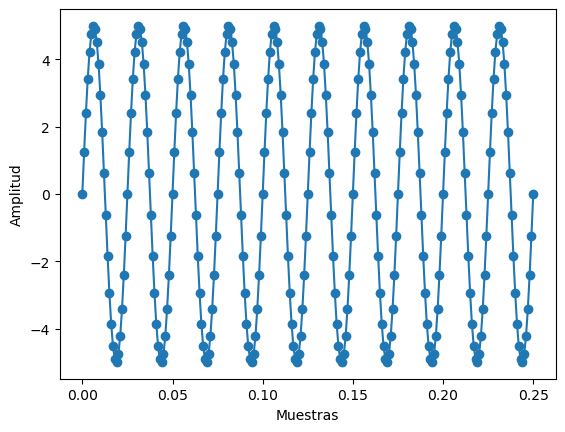

In [17]:
plt.plot(t10, x10, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

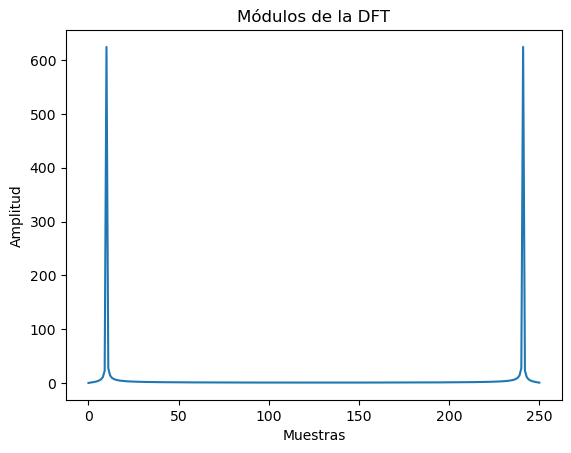

In [8]:
X10 = np.fft.fft(x10)
plt.plot(abs(X10))
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

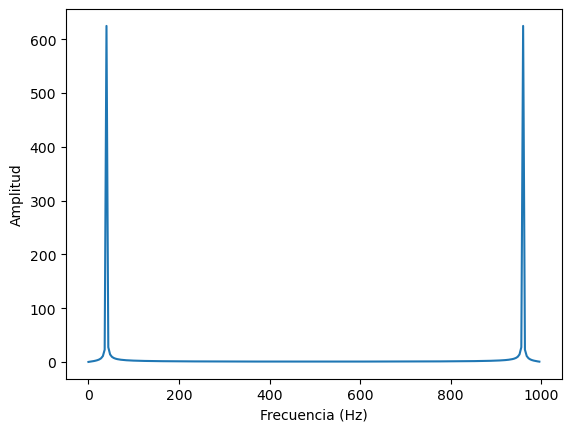

In [9]:
N = len(X10)
F = np.arange(0,N)*Fs/N
plt.plot(F,abs(X10))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

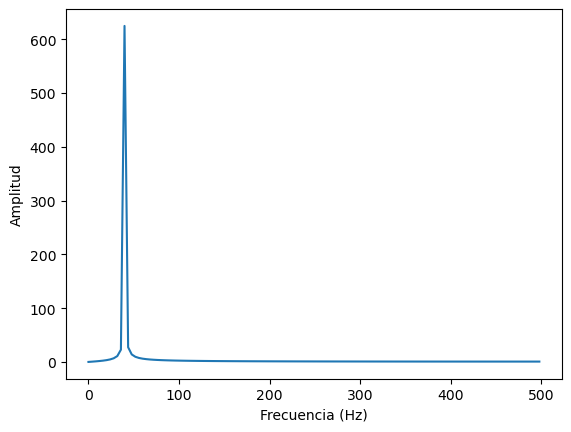

In [10]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = X10[0:Nmitad]
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()

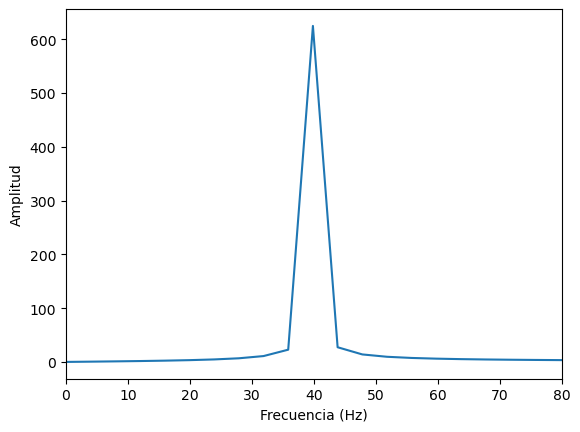

In [11]:
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,80)
plt.show()

In [ ]:
# Usando Welch
fs = 1000 # Frecuencia de muestreo
nperseg = 2000 # Ancho de la ventana
noverlap = int(nperseg/2) # Solapamiento de las ventanas al 50%
f, Pxx = pwelch(senal[0,:], fs, 'hanning', nperseg, noverlap)
# Graficamos frecuencia vs potencia
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 50]) # rango para el eje x
plt.show()

# Aplicación

# 4.1	Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente

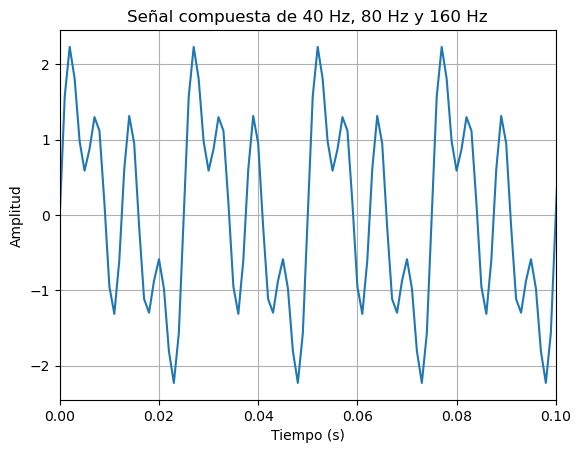

In [38]:
f1 = 40
f2 = 80
f3 = 160

# Frecuencia de muestreo (mayor que el doble de la frecuencia máxima)
fs = 1000  # Frecuencia de muestreo en Hz
T = 1 / fs  # Periodo de muestreo

t = np.arange(0, 1, T)

# Suma de las componentes sinusoidales
A1, A2, A3 = 1, 1, 1  # Amplitudes de cada componente
x = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t) + A3 * np.sin(2 * np.pi * f3 * t)

plt.plot(t, x)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal compuesta de 40 Hz, 80 Hz y 160 Hz')
plt.grid(True)
plt.xlim([0, 0.1])
plt.show()

# 4.2	Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal).

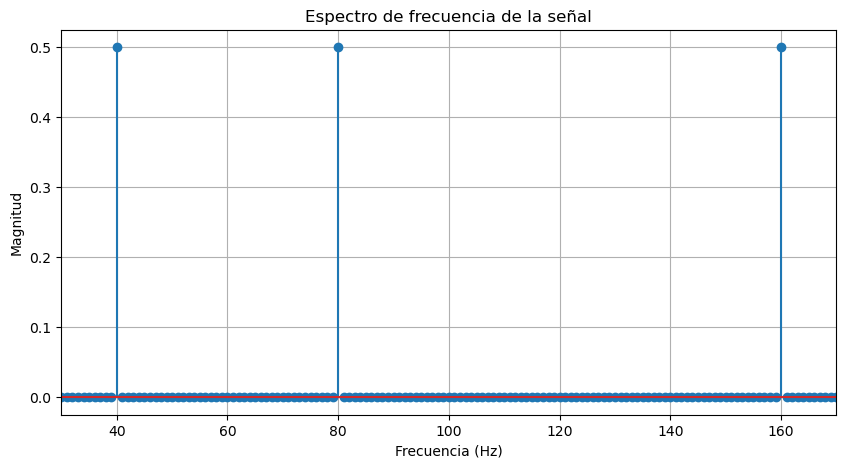

In [40]:
X = np.fft.fft(x)
N = len(X)
f = np.fft.fftfreq(N, T)  # Frecuencias correspondientes

# Espectro de frecuencias
plt.figure(figsize=(10, 5))
plt.stem(f[:N // 2], np.abs(X[:N // 2]) / N)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de frecuencia de la señal')
plt.grid(True)
plt.xlim([30, 170])  # Mostrar el rango de frecuencias relevante
plt.show()

Se ven claramente picos en los valores de las frecuencias de las 3 componentes sinusoidales, 40, 80 y 160 Hz

# 4.3	Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.

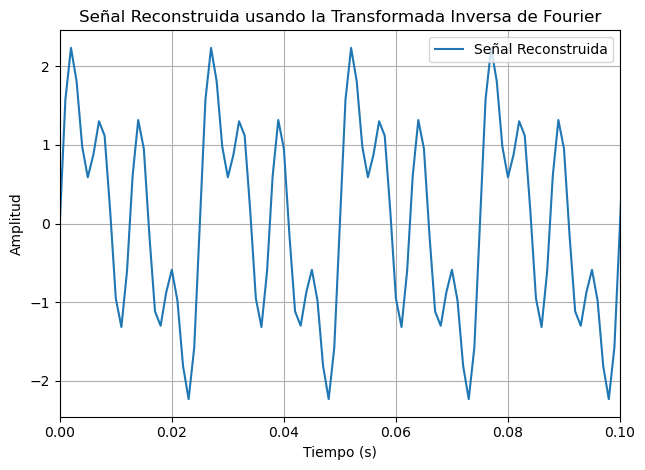

In [5]:
x_reconstructed = np.fft.ifft(X)
plt.plot(t, x_reconstructed.real, label='Señal Reconstruida', linestyle='-')
plt.title('Señal Reconstruida usando la Transformada Inversa de Fourier')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.xlim([0, 0.1])
plt.show()

La señal reconstruida con la transformada inversa de fourier es identica a la señal original compuesta por las señales de 40 Hz, 80 Hz y 160 Hz

# ¿Podria decir que las siguientes lineas aplican un filtro?

F1 = np.fft.fft(x);

F2 = np.zeros((len(F1)));

F2[9:13] = F1[9:13];

xr = np.fft.ifft(F2);

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(t, np.real(xr))

ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');

plt.show()


Inicialmente se calcula la Transformada de Fourier de la señal x en la variable F1, lo que nos da la representación de la señal en el dominio de la frecuencia. F1 contiene los coeficientes que representan las amplitudes de las diferentes frecuencias presentes en la señal, mientras que F2 es un array de ceros del mismo tamaño de F1. Luego se le asigna a F2 en las componentes de frecuencia [9:13] las componentes de F1 en dicho componente de frecuencia, es decir solo estas frecuencias estan presentes en F2 y los demas valores son cero. Según lo anterior este codigo funciona como un filtro pasa banda, ya que solo deja pasar las frecuencias que van desde el indice 9 hasta el 13 y elimina las demas.

Luego se aplica la transformada inversa de fourier sobre F2 (señal filtrada), para obtener la señal solamente con las freceuncias filtradas, dicha transformada estará guardada en la variable xr que muestra la señal filtrada.

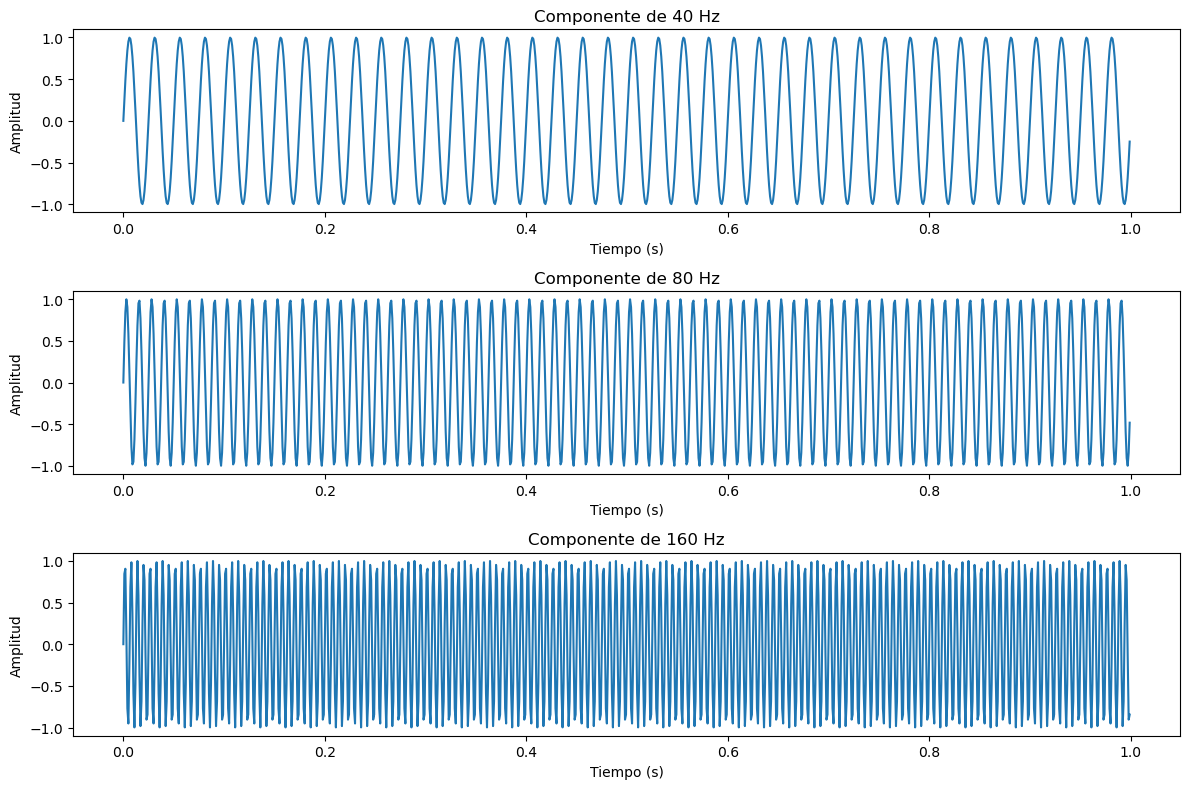

In [43]:
F2_40Hz = np.zeros(len(X), dtype=complex)
F2_80Hz = np.zeros(len(X), dtype=complex)
F2_160Hz = np.zeros(len(X), dtype=complex)

# f = k * fs / N, despejando k = f * N / fs
N = len(X)
k_40Hz = int(f1 * N / fs)
k_80Hz = int(f2 * N / fs)
k_160Hz = int(f3 * N / fs)

# Extraer cada componente (ambos lados de la frecuencia, positiva y negativa)
F2_40Hz[k_40Hz] = X[k_40Hz]
F2_40Hz[-k_40Hz] = X[-k_40Hz]

F2_80Hz[k_80Hz] = X[k_80Hz]
F2_80Hz[-k_80Hz] = X[-k_80Hz]

F2_160Hz[k_160Hz] = X[k_160Hz]
F2_160Hz[-k_160Hz] = X[-k_160Hz]

# Transformada Inversa para cada componente
x_40Hz = np.fft.ifft(F2_40Hz)
x_80Hz = np.fft.ifft(F2_80Hz)
x_160Hz = np.fft.ifft(F2_160Hz)

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, np.real(x_40Hz))
plt.title('Componente de 40 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(t, np.real(x_80Hz))
plt.title('Componente de 80 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 3)
plt.plot(t, np.real(x_160Hz))
plt.title('Componente de 160 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

# 4.5	El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. 

# Señal sin filtrar

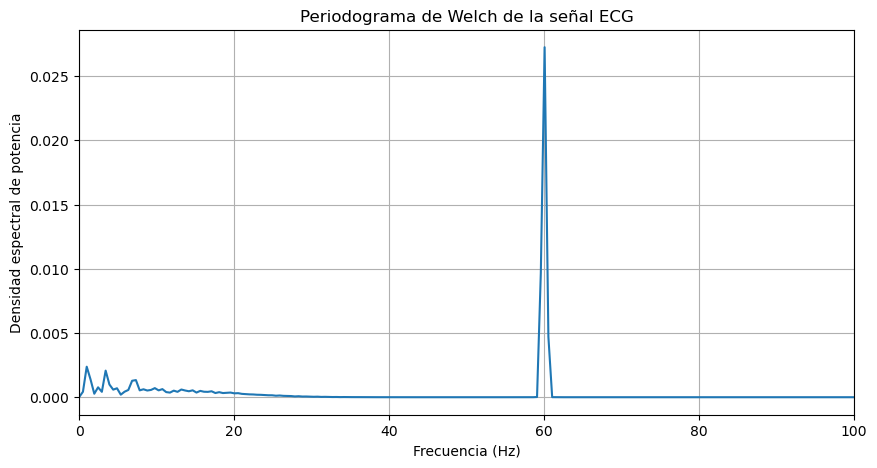

In [19]:
# Cargar el archivo .mat
data = loadmat('senecg.mat')
ecg_signal = np.ravel(data['ECG'])
fs = 250  # Frecuencia de muestreo

nperseg = 512  # Ancho de la ventana en muestras
noverlap = nperseg // 2  # Solapamiento del 50%
f, Pxx = pwelch(ecg_signal.flatten(), fs, window='hann', nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(10, 5))
plt.plot(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal ECG')
plt.xlim([0, 100])  # Mostrar hasta la mitad de la frecuencia de muestreo
plt.grid()
plt.show()

Se puede observar un pico en los 60 Hz de frecuencia, pico anormal con respecto al resto de valores de la señal, por lo que este pico se considera ruido, además de que es bastante común encontrar ruido en los 60 Hz correspondiente a alguna señal electrica, conocido también como ruido electrico.

# Señal filtrada

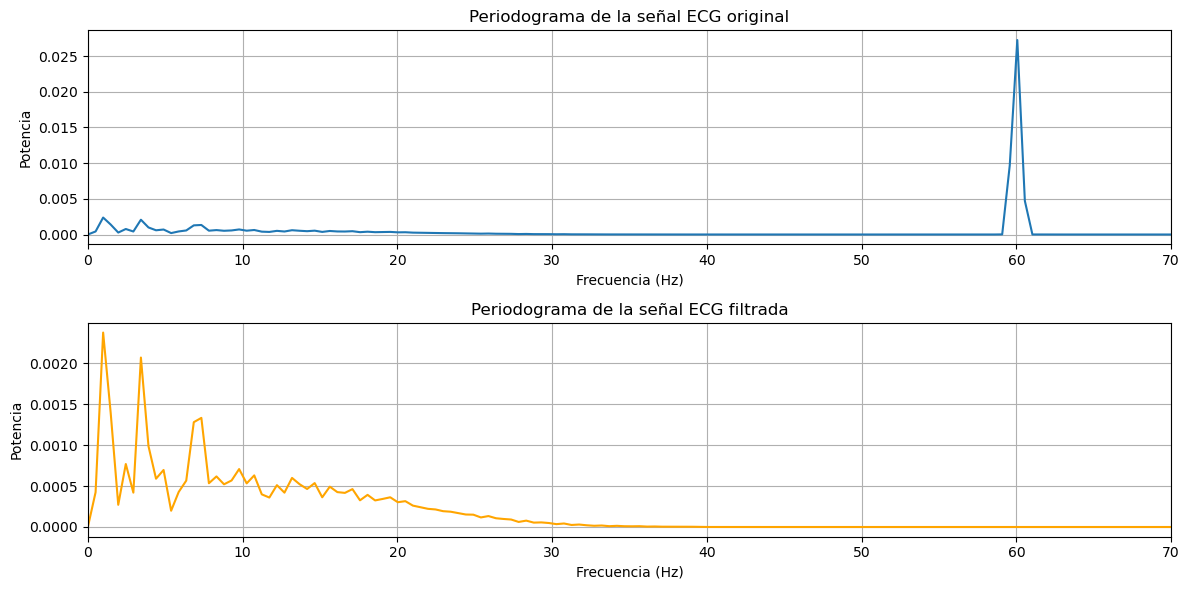

In [21]:
F_ecg = np.fft.fft(ecg_signal)

F_filtered = np.copy(F_ecg)
cutoff = int(40 * len(F_ecg) / fs)  # Índice correspondiente a 40 Hz
F_filtered[cutoff:-cutoff] = 0  # Eliminar componentes de frecuencia superiores a 40 Hz

# Transformada Inversa para obtener la señal filtrada
ecg_filtered = np.fft.ifft(F_filtered)
f_filtered, Pxx_filtered = pwelch(np.real(ecg_filtered), fs, window='hann', nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f, Pxx, label='Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de la señal ECG original')
plt.xlim([0, 70])
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(f_filtered, Pxx_filtered, label='Filtrada', color='orange')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de la señal ECG filtrada')
plt.xlim([0, 70])
plt.grid()

plt.tight_layout()
plt.show()

- Se eligio una frecuencia de muestreo de 250 Hz, la ventana de 512 muestras cubre aproximadamente 2 segundos de la señal (ya que 512/250=2.048 segundos). Esto permite capturar adecuadamente variaciones de baja frecuencia presentes en el ECG, como las relacionadas con la respiración o el ritmo cardíaco.
- Se eligió un solapamiento del 50% (256 muestras) porque ayuda a suavizar aún más la estimación del espectro de potencia sin perder demasiada independencia entre las ventanas. El solapamiento reduce la variabilidad entre los segmentos y proporciona una estimación espectral más estable, crucial para identificar la presencia de ruido en el ECG.

El análisis de frecuencia de la señal ECG mediante el periodograma de Welch reveló la mayor concentración de energía en el rango de bajas frecuencias, coherente con la naturaleza de las ondas cardíacas, las cuales se ubican típicamente en el rango de 0.5 a 50 Hz [6]. Esto es fundamental para diagnosticar arritmias o alteraciones en la actividad cardíaca.

# 4.6	Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. 

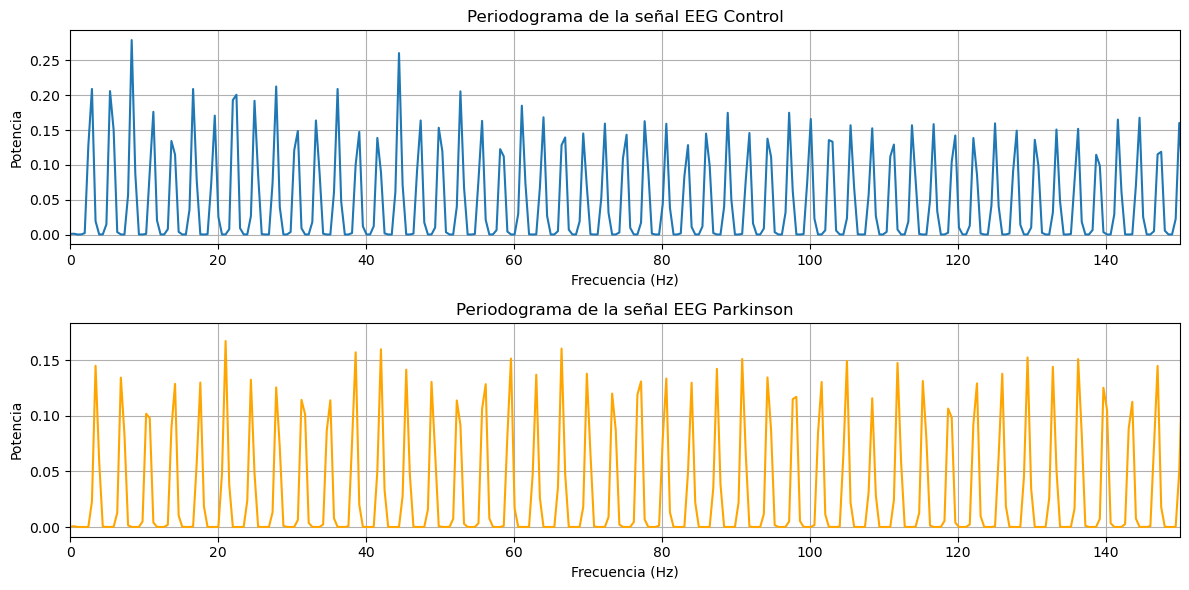

In [4]:
# Cargar el archivo los archivos del sujeto control y parkinson
control = loadmat('C001R_EP_reposo.mat')
eeg_control = control['data']
parkinson = loadmat('P001_EP_reposo.mat')
eeg_park = parkinson['data']

fs = 500  # Frecuencia de muestreo
nperseg = 1024  # Ancho de la ventana
noverlap = nperseg // 2  # Solapamiento del 50%

f_ctrl, Pxx_ctrl = pwelch(eeg_control.flatten(), fs, window='hann', nperseg=nperseg, noverlap=noverlap)
f_park, Pxx_park = pwelch(eeg_park.flatten(), fs, window='hann', nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f_ctrl, Pxx_ctrl, label='Control')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de la señal EEG Control')
plt.xlim([0, 150])
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(f_park, Pxx_park, label='Parkinson', color='orange')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de la señal EEG Parkinson')
plt.xlim([0, 150])
plt.grid()

plt.tight_layout()
plt.show()

# Análisis de los periodogramas

En el periodograma del sujeto control, se observa una serie de picos distribuidos a lo largo del espectro de frecuencias, con una concentración notable de potencia en frecuencias bajas y medias (0-50 Hz). Se identifican picos de potencia más marcados alrededor de los 10 Hz, 20 Hz, 40 Hz, y 80 Hz. Esto es característico de la actividad cerebral normal, donde las bandas alfa (7-13 Hz) y beta (13-35 Hz) suelen ser dominantes durante el reposo con los ojos cerrados y la actividad mental ligera [4]. En este caso, la amplitud de los picos disminuye de manera progresiva conforme aumentan las frecuencias, lo cual es común en señales EEG de sujetos sanos, ya que la mayoría de la actividad cerebral significativa ocurre en frecuencias bajas [4]. La señal presenta una mayor potencia en frecuencias inferiores a 50 Hz, con picos más prominentes en el rango de 10-40 Hz.

En el periodograma del sujeto con Parkinson, también se observan picos distribuidos a lo largo de las frecuencias, pero la distribución de la potencia y la amplitud de estos picos presentan diferencias significativas en comparación con el sujeto control. En el caso del sujeto con Parkinson, se observan picos más amplios y con una potencia significativamente mayor en el rango de 10-20 Hz, especialmente en la banda beta (13-35 Hz) [4]. Este aumento de potencia en la banda beta es consistente con la literatura sobre Parkinson, donde se ha demostrado que la actividad beta se encuentra exagerada en pacientes con la enfermedad [4], esto se debe a la disfunción de los ganglios basales y una sincronización excesiva en estas frecuencias. A medida que se incrementan las frecuencias hacia el rango de 40 Hz y superiores, la potencia decrece más lentamente en comparación con el sujeto control, lo cual es un indicativo que hay una mayor actividad en frecuencias medias. La potencia en frecuencias bajas es considerablemente alta en comparación con el sujeto control, lo que puede asociarse a la bradiquinesia y los temblores característicos del Parkinson, los cuales se reflejan en una actividad sincronizada de baja frecuencia.

La señal del sujeto con Parkinson presenta picos de mayor amplitud en la banda beta, lo que es una indicación de la alteración en la actividad motora. Esto podría ser un marcador importante para diferenciar la actividad cerebral de sujetos sanos y sujetos con Parkinson. Por otro lado, el sujeto control muestra una distribución más equilibrada y una disminución más rápida de la potencia conforme aumenta la frecuencia. La señal del sujeto control presenta una mayor claridad y un perfil de frecuencia típico de la actividad cerebral en reposo, mientras que la señal de Parkinson muestra alteraciones en la banda beta, las cuales son un indicativo de las disfunciones motoras y de la patología subyacente.

En ambos periodogramas, la potencia en frecuencias superiores a 40 Hz disminuye considerablemente, lo que es consistente con la naturaleza de las señales EEG, donde la mayoría de la actividad cerebral relevante se encuentra en rangos de baja a media frecuencia [5], sin embargo, la señal de Parkinson mantiene una potencia ligeramente más elevada en estas frecuencias en comparación con el control, lo que podría estar relacionado con la presencia de artefactos o actividad muscular involuntaria debido a los síntomas de la enfermedad (ruido).

# Justificación de los Parámetros Utilizados:

Se eligió un tamaño de ventana de 1024 muestras porque esto permite analizar aproximadamente 2 segundos de la señal, considerando una frecuencia de muestreo de 500 Hz. Una ventana de este tamaño ofrece un buen equilibrio entre resolución temporal y resolución en frecuencia. Con un nperseg de 1024, obtenemos una resolución de aproximadamente 0.5 Hz en el dominio de la frecuencia (500 Hz / 1024 ≈ 0.49 Hz). Esto es útil para identificar diferencias en frecuencias bajas y medias, que son relevantes para analizar señales EEG.

La frecuencia de muestreo de 500 Hz es adecuada para señales EEG, ya que cubre el rango de interés de las señales cerebrales (0.5-100 Hz), permitiendo registrar todas las bandas principales (delta, theta, alfa, beta, y gamma) [5].
Según el teorema de muestreo de Nyquist, la frecuencia de muestreo debe ser al menos el doble de la máxima frecuencia de la señal. Con 500 Hz, se asegura una cobertura adecuada hasta 250 Hz, que es más que suficiente para captar todas las características relevantes de una señal EEG.

Se utilizó un solapamiento del 50% (512 muestras) para asegurar que las ventanas consecutivas tengan suficiente superposición, lo que mejora la estabilidad de la estimación de potencia. Esto ayuda a obtener un espectro más suave y reduce la variabilidad entre las ventanas. El solapamiento del 50% es común en la estimación de espectros con el método de Welch, ya que proporciona un buen compromiso entre la independencia de los segmentos y la reducción del ruido en el espectro final [2].

# Conclusiones

En el presente análisis se abordaron diversas técnicas de procesamiento de señales bioeléctricas, aplicadas tanto a señales de ECG como de EEG, mediante el uso de la Transformada de Fourier, Transformada Inversa de Fourier y periodogramas de Welch. El objetivo fue identificar componentes frecuenciales y mejorar la interpretación de las señales a partir de un procesamiento adecuado, así como extraer información relevante que permita caracterizar mejor las dinámicas subyacentes en estas señales.

El análisis detallado de los periodogramas de Welch de las señales EEG de un sujeto control y uno con Parkinson revela diferencias significativas en la distribución de la potencia en diferentes bandas de frecuencia. La señal del sujeto con Parkinson muestra una mayor potencia en la banda beta, lo cual es característico de la enfermedad y sugiere una alteración en la sincronización de la actividad cerebral. Estas diferencias son importantes para la caracterización de la patología y pueden servir como base para el desarrollo de herramientas de diagnóstico y monitoreo de la enfermedad de Parkinson.

El análisis realizado permitió una comprensión profunda de las técnicas de procesamiento de señales aplicadas a bioseñales, resaltando la importancia de la Transformada de Fourier para la identificación de componentes frecuenciales y el uso de periodogramas de Welch para el análisis espectral detallado. Las metodologías aplicadas demostraron ser efectivas para extraer información relevante de señales complejas como el ECG y EEG, lo que es esencial para el diagnóstico y monitoreo de condiciones como arritmias cardíacas y trastornos neurológicos como el Parkinson.

Finalmente, la correcta selección de los parámetros de análisis (frecuencia de muestreo, ventana, solapamiento) es fundamental a la hora de obtener resultados precisos y confiables. Este estudio subraya la importancia del procesamiento adecuado de señales bioeléctricas para obtener información coherente que pueda ser aplicada en el ámbito académico y clínico, contribuyendo al desarrollo de herramientas diagnósticas y de monitoreo más avanzadas.

# Referencias

[1] Python Programming and Numerical Methods. Elsevier, 2021. [En línea]. Disponible: https://doi.org/10.1016/c2018-0-04165-1

[2] “welch — SciPy v1.14.1 Manual”. Numpy and Scipy Documentation — Numpy and Scipy documentation. [En línea]. Disponible: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html

[3] “¿Qué son las ondas Cerebrales? - NeuroFeedBack Barcelona”. NeuroFeedBack Barcelona. [En línea]. Disponible: https://www.neurofeedback.cat/que-son-las-ondas-cerebrales/

[4] “Changes of the brain’s bioelectrical activity in cognition, consciousness, and some mental disorders”. PubMed Central (PMC). [En línea]. Disponible: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5804435/#:~:text=Slow%20brain%20waves%20are%20seen,as%20epilepsy,%20anxiety,%20posttraumatic%20stress

[5] “Electroencephalography Signal Processing: A Comprehensive Review and Analysis of Methods and Techniques”. PubMed Central (PMC). [En línea]. Disponible: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10385593/#:~:text=EEG%20is%20a%20signal%20pattern,electrodes%20applied%20onto%20the%20scalp.

[6] “In brief: What is an electrocardiogram (ECG)? - InformedHealth.org - NCBI Bookshelf”. National Center for Biotechnology Information. [En línea]. Disponible: https://www.ncbi.nlm.nih.gov/books/NBK536878/